<a href="https://colab.research.google.com/github/oleksii-shcherbak/GoIT-num-prog-py-hw/blob/main/hw_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Display dataset description
print("Dataset Description:")
print(data.DESCR)

Dataset Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is 

### Step 2

In [21]:
# Create DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display first few rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Step 3

In [15]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### Step 4

In [22]:
# Display descriptive statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Step 5

In [23]:
# Function for data scaling
def data_scale(data, scaler_type='std'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer

    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'std':
        scaler = StandardScaler()
    elif scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

# Separate features from target
X = df.drop('target', axis=1)

# Standardize the data
X_scaled = data_scale(X.values, scaler_type='std')

# Create DataFrame with scaled data
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['target'] = df['target'].values

print("Standardization completed")
df_scaled.head()

Standardization completed


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


### Step 6

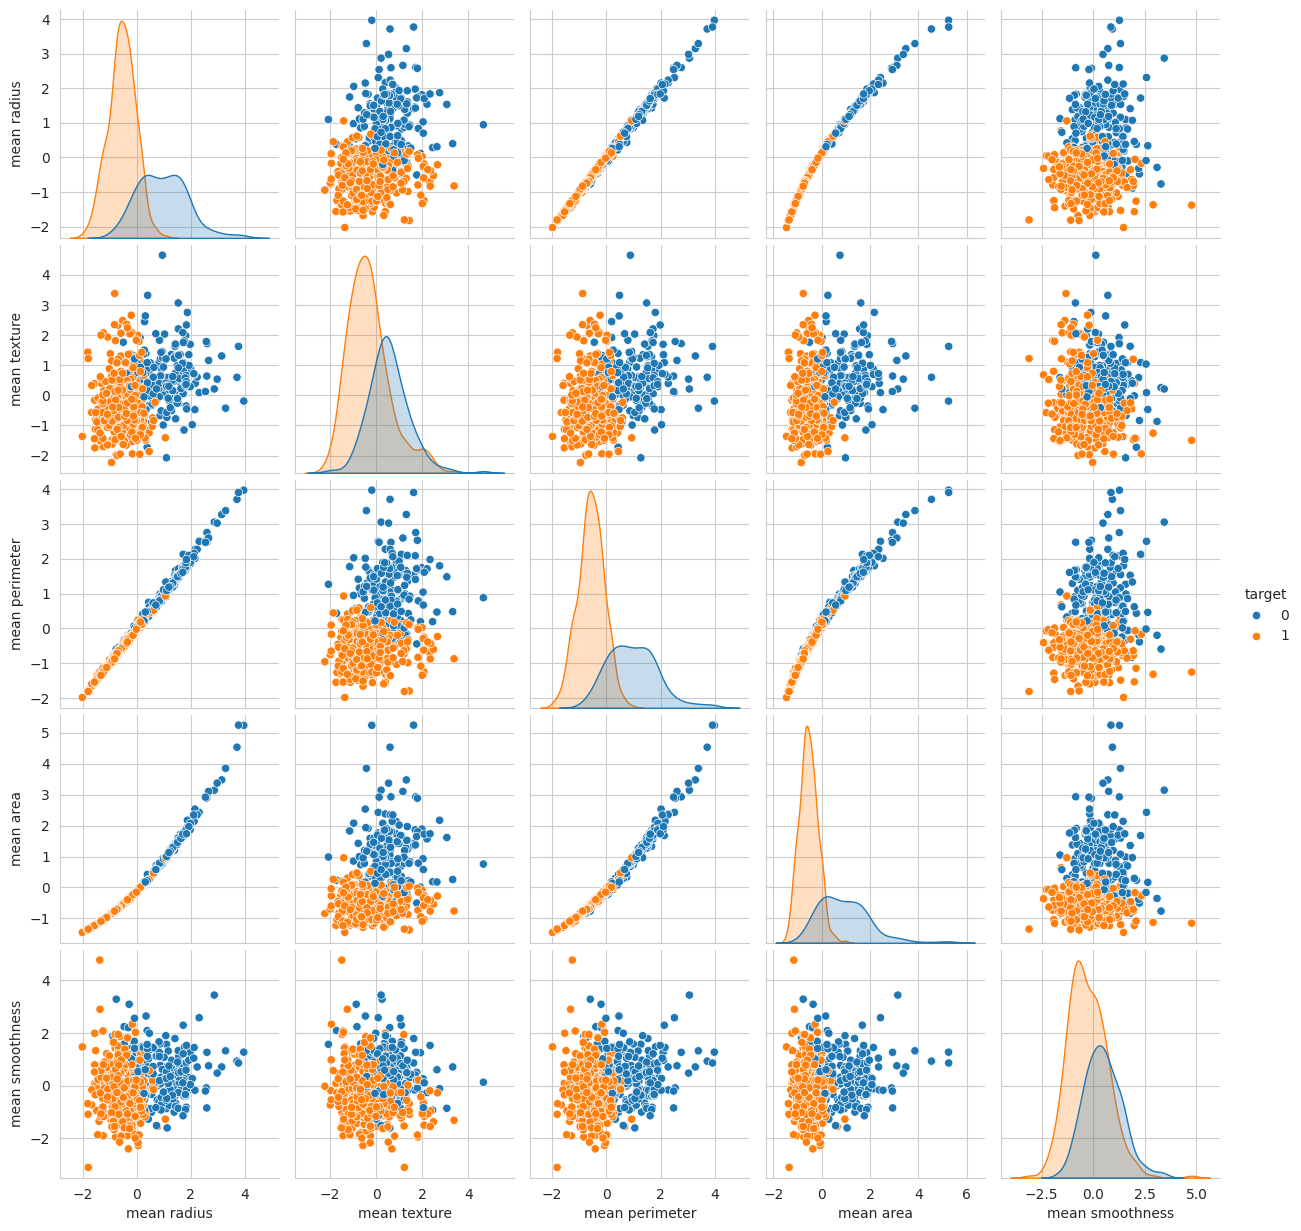

In [18]:
# Create pairplot for first few features (to avoid overcrowding)
# Using first 5 features plus target
features_to_plot = list(X.columns[:5]) + ['target']
df_plot = df_scaled[features_to_plot].copy()

# Create pairplot
sns.pairplot(df_plot, hue='target', diag_kind='kde')
plt.show()

### Step 7

In [19]:
# Function for calculating distance matrix
def distance_matrix(df, metric='euclidean'):
    numeric_columns = df.select_dtypes(include='number')
    distance_matrix = pairwise_distances(numeric_columns, metric=metric)
    result_df = pd.DataFrame(distance_matrix,
                            index=numeric_columns.index,
                            columns=numeric_columns.index)
    return result_df

# Select subset of data for distance matrix (first 50 samples for better visualization)
df_subset = df_scaled.iloc[:50, :30]  # First 50 samples, all 30 features

# Calculate distance matrices for different metrics
metrics = ['cityblock', 'cosine', 'euclidean', 'l1', 'manhattan']
distance_matrices = {}

for metric in metrics:
    # Note: 'l1' and 'manhattan' are the same
    if metric == 'l1':
        metric_name = 'manhattan'
    else:
        metric_name = metric

    distance_matrices[metric] = distance_matrix(df_subset, metric=metric_name)
    print(f"Distance matrix for {metric} calculated")

Distance matrix for cityblock calculated
Distance matrix for cosine calculated
Distance matrix for euclidean calculated
Distance matrix for l1 calculated
Distance matrix for manhattan calculated


### Step 8

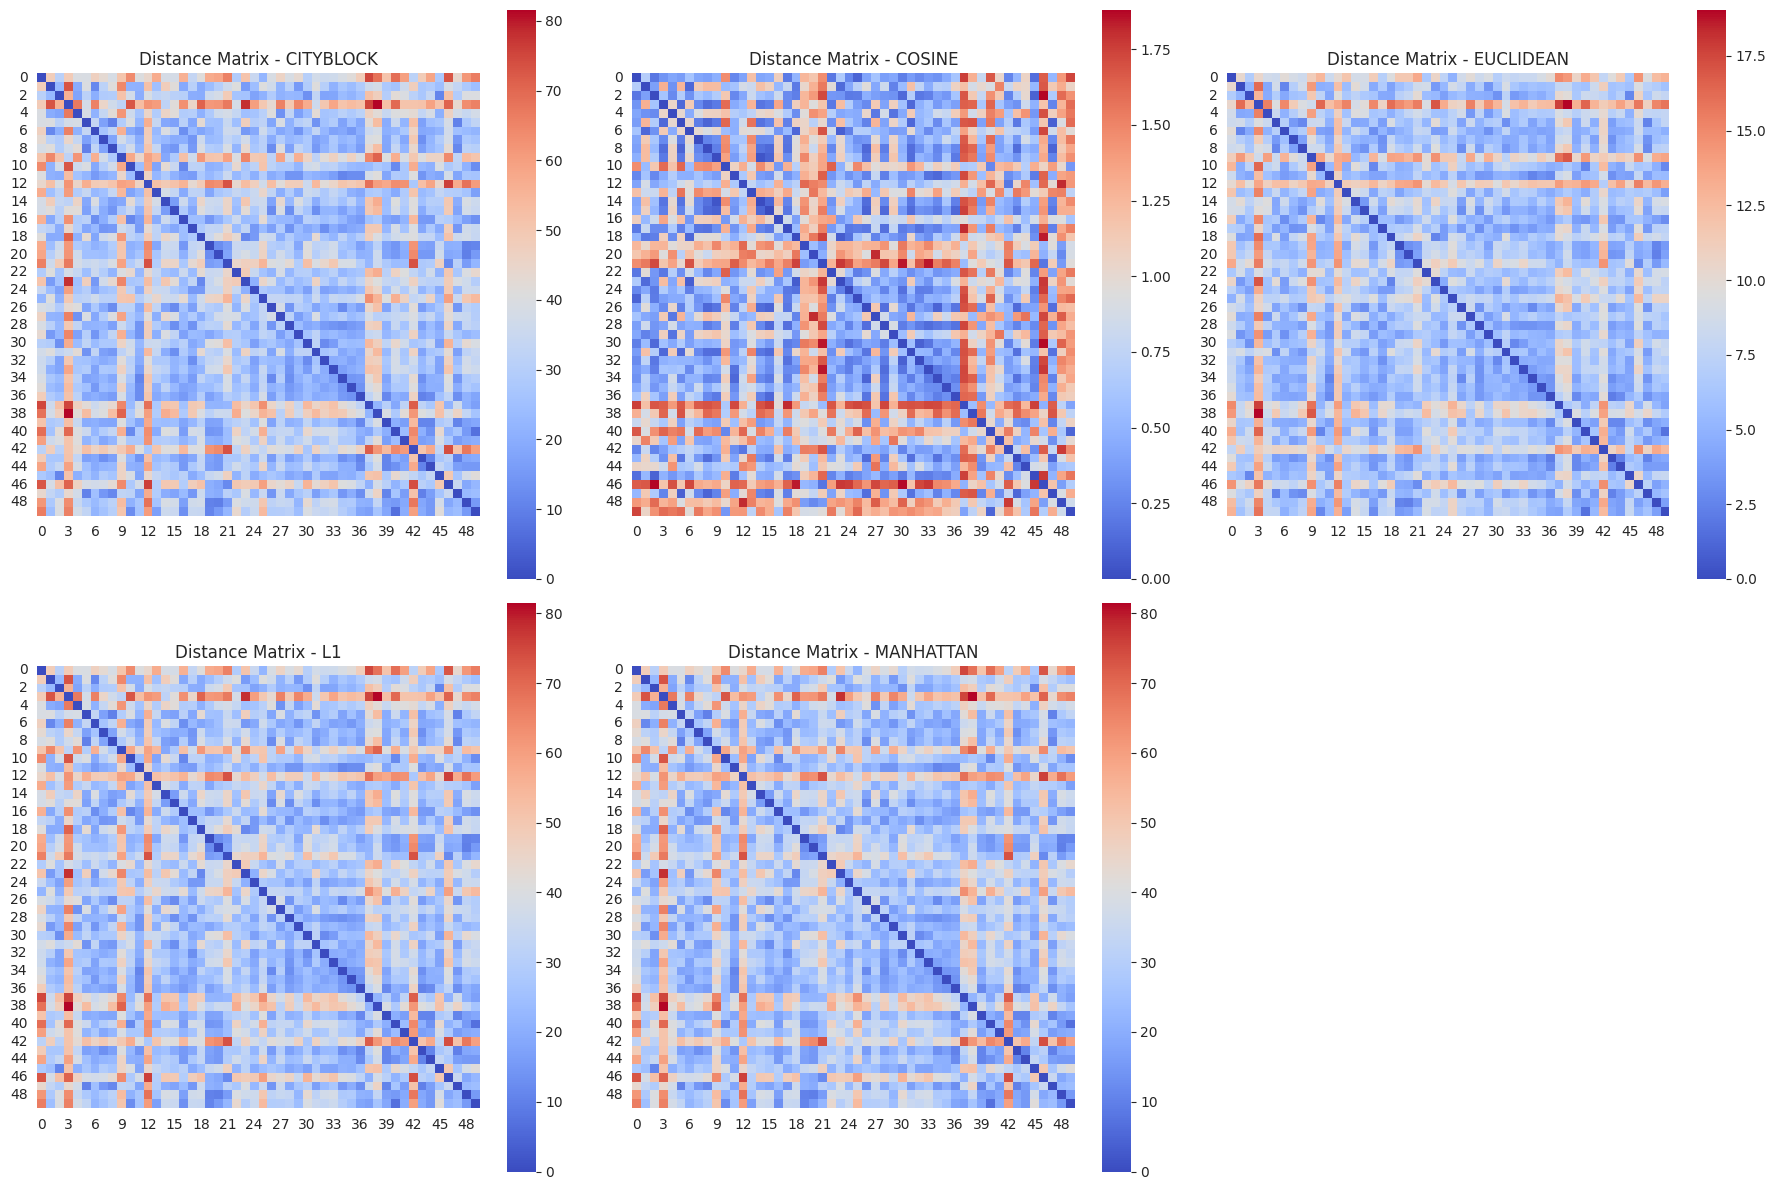

In [20]:
# Visualize all distance matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (metric, matrix) in enumerate(distance_matrices.items()):
    if idx < len(axes):
        sns.heatmap(matrix,
                   cmap='coolwarm',
                   square=True,
                   cbar=True,
                   ax=axes[idx])
        axes[idx].set_title(f'Distance Matrix - {metric.upper()}')

# Remove empty subplot
if len(distance_matrices) < 6:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Step 9

### Conclusions and Analysis

#### 1. Dataset Overview

The Breast Cancer Wisconsin dataset contains:
- **569 samples** (212 malignant, 357 benign)
- **30 features** describing cell nuclei characteristics
- **No missing values**, ensuring data quality
- Features are computed in three categories: mean, standard error, and worst values

#### 2. Impact of Data Standardization

Standardization was essential for this analysis:
- **Original scale variance**: Features ranged from 0.053-0.163 (smoothness) to 143.5-2501.0 (area)
- **After standardization**: All features transformed to mean=0, std=1
- This ensures equal contribution from all features in distance calculations
- Without standardization, area-related features would completely dominate distance metrics

#### 3. Pairplot Analysis

The pairplot reveals:
- **Clear visual separation** between malignant (class 0, orange) and benign (class 1, blue) tumors
- **Strong linear relationships** between related features (radius-perimeter-area show near-perfect correlation)
- **Most discriminative features**: mean radius, mean perimeter, and mean area show the clearest separation
- **Distribution patterns**: Malignant tumors generally have larger values across most features

#### 4. Distance Metrics Analysis

##### Visual Pattern Analysis from Heatmaps:

**Cityblock/Manhattan/L1 Metrics** (identical results as expected):
- Show consistent blue-red patterns with clear block structures
- Distance range: 0-80 units
- Visible clustering of similar samples (blue blocks along diagonal)

**Euclidean Distance**:
- Similar pattern to Manhattan but with smoother gradients
- Distance range: 0-17.5 units (smaller due to squared root calculation)
- More sensitive to outliers visible as dark red spots

**Cosine Distance**:
- Distinctly different pattern with more pronounced contrasts
- Distance range: 0-1.75 (normalized angular measure)
- Shows pattern similarity regardless of magnitude
- Notable red bands indicating samples with very different orientations

##### Key Observations:
- **Clear cluster structure**: All metrics show distinct groupings, likely corresponding to tumor types
- **Samples around indices 35-40**: Show high distance (red) to most other samples across all metrics, suggesting potential outliers
- **Block patterns**: Visible in indices 0-20 and 25-35, indicating groups of similar samples

#### 5. Effectiveness Comparison

Based on the distance matrices visualization:

1. **Euclidean Distance**:
   - Provides smooth, continuous distance measurements
   - Best for algorithms assuming spherical clusters
   - Recommended for k-NN classification

2. **Manhattan Distance (Cityblock/L1)**:
   - More robust to outliers
   - Better for high-dimensional sparse data
   - All three variants produce identical results

3. **Cosine Distance**:
   - Captures directional similarity
   - Less affected by magnitude differences
   - Useful for identifying tumors with similar growth patterns regardless of size

#### 6. Recommendations

For breast cancer classification using this dataset:

1. **Primary recommendation**: Use **Euclidean distance** with standardized data
   - Provides intuitive geometric interpretation
   - Works well with the continuous nature of the features
   - Compatible with most ML algorithms

2. **Alternative approach**: Use **Cosine distance** for pattern-based analysis
   - When tumor size is less important than growth pattern
   - For comparing relative feature proportions

3. **Feature engineering suggestion**:
   - Consider dimensionality reduction (PCA) due to high correlation between size-related features
   - The strong correlation between radius, perimeter, and area suggests redundancy

#### 7. Summary

The analysis demonstrates that:
- All distance metrics successfully identify structure in the data
- Clear separation exists between malignant and benign tumors
- Standardization is crucial for meaningful distance calculations
- The choice of metric should align with the specific classification approach:
  - Euclidean for general-purpose classification
  - Manhattan for robustness against outliers
  - Cosine for pattern-based analysis